In [50]:
import os
from os import path
import shutil
import pandas as pd
from matplotlib import pyplot as plt

In [51]:
# Fetch all regular motion files
target_path_1 = '../Traces_Real/Backlash'
target_path_2 = '../Traces_Real/PTP_Aut_Backlash_Comparator'
target_path_3 = '../Traces_Simulation/PTP_Backlash_Comp_sim'
root_path = './'
fileNames_1 = os.listdir(target_path_1)
fileNames_2 = os.listdir(target_path_2)
fileNames_3 = os.listdir(target_path_3)
fileNames_Backlash = [file for file in fileNames_1 if 'KRCIpo.csv' in file]
fileNames_Comparator_Real = [file for file in fileNames_2 if 'KRCIpo.csv' in file]
fileNames_Comparator_Sim = [file for file in fileNames_3 if 'KRCIpo.csv' in file]

for file in fileNames_Backlash:
    shutil.copy(path.join(target_path_1, file), root_path)

for file in fileNames_Comparator_Real:
    shutil.copy(path.join(target_path_2, file), root_path)

for file in fileNames_Comparator_Sim:
    shutil.copy(path.join(target_path_3, file), root_path)


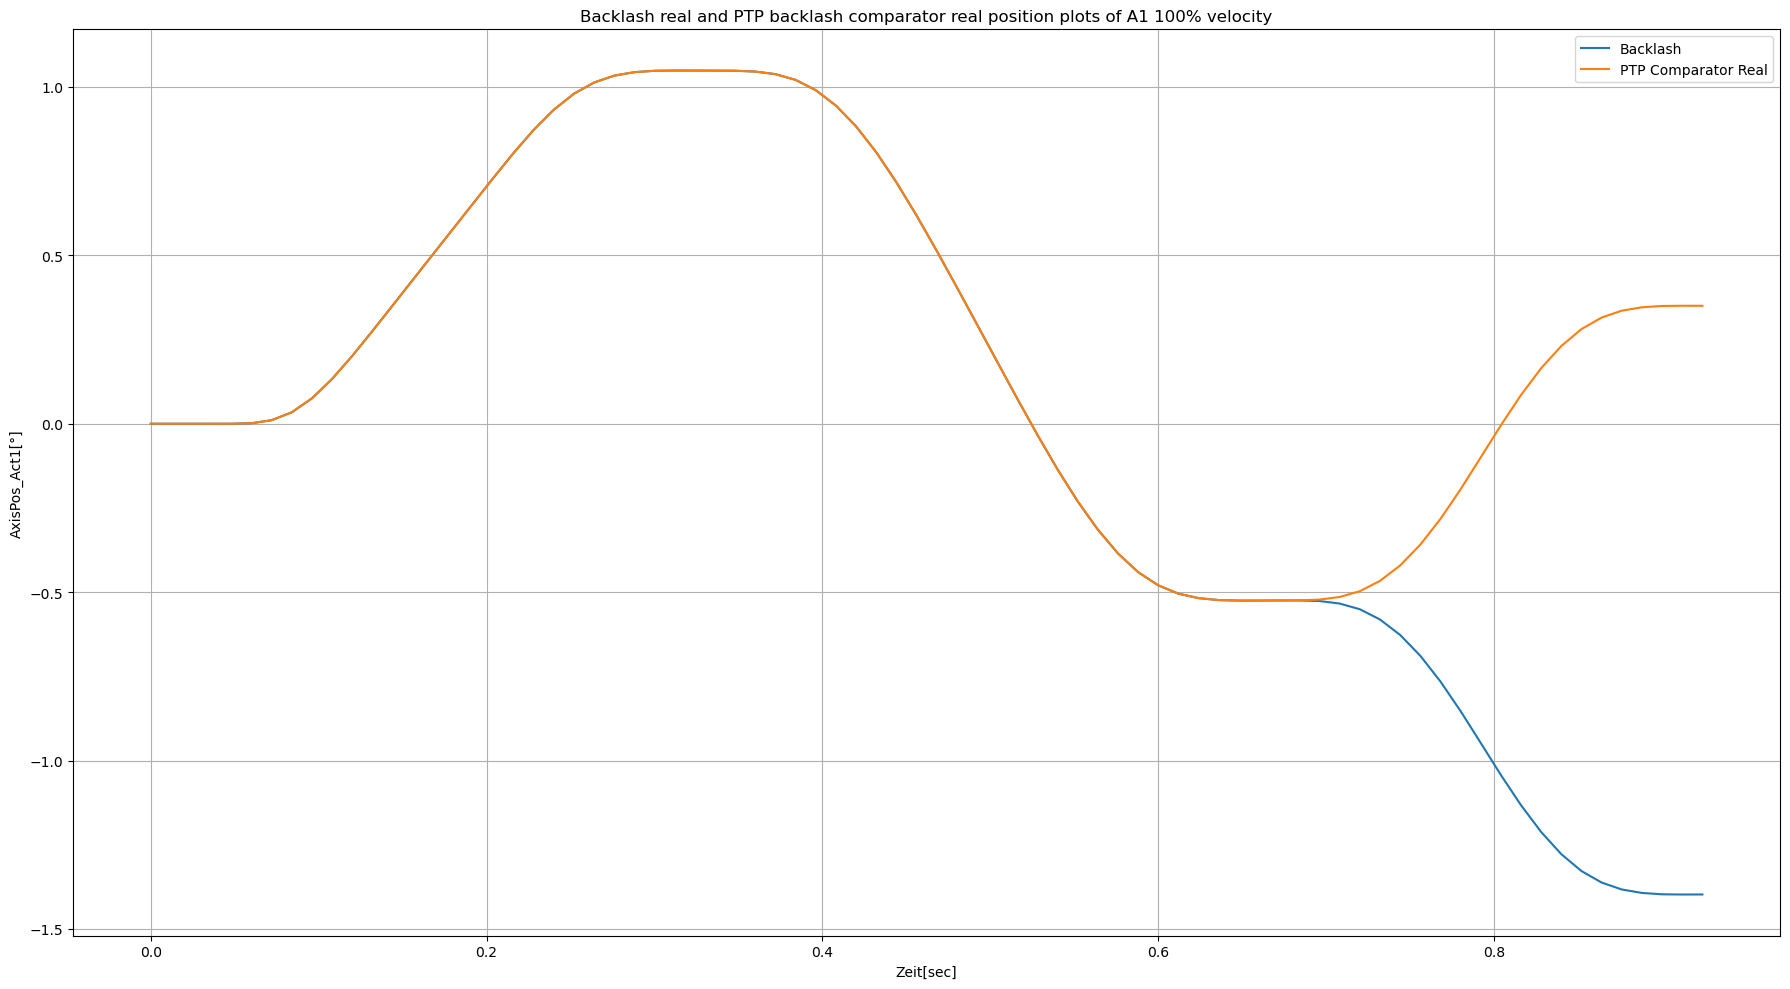

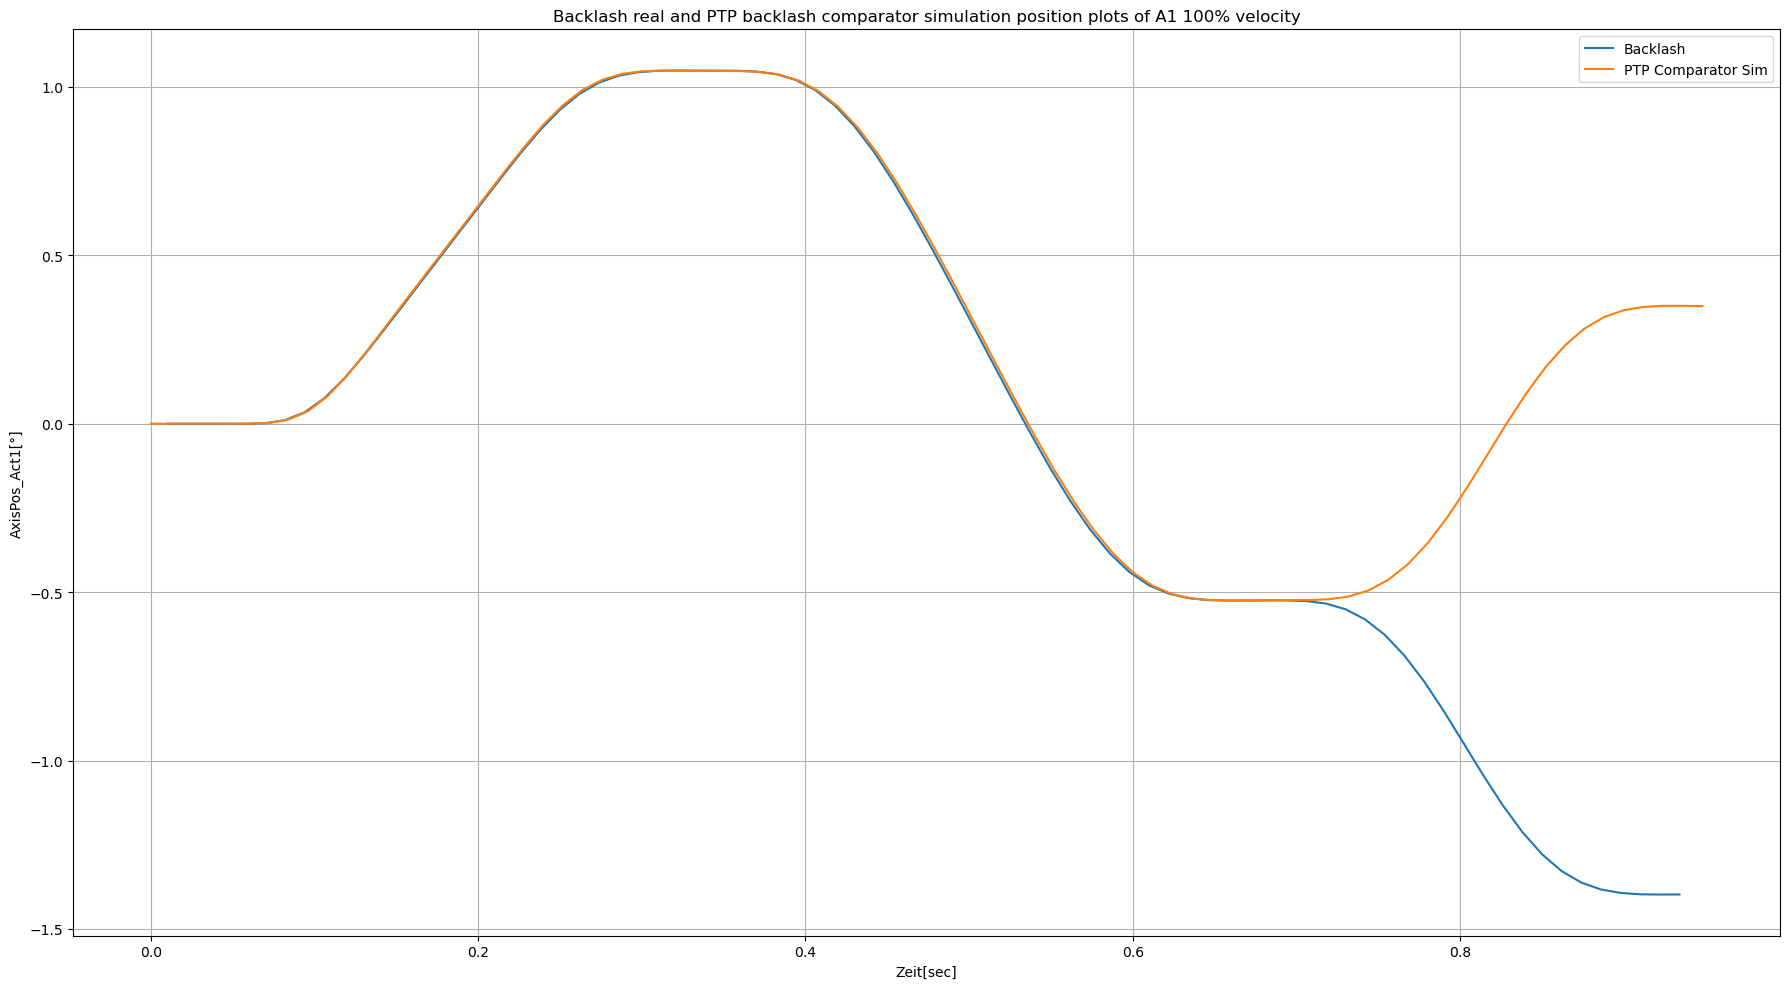

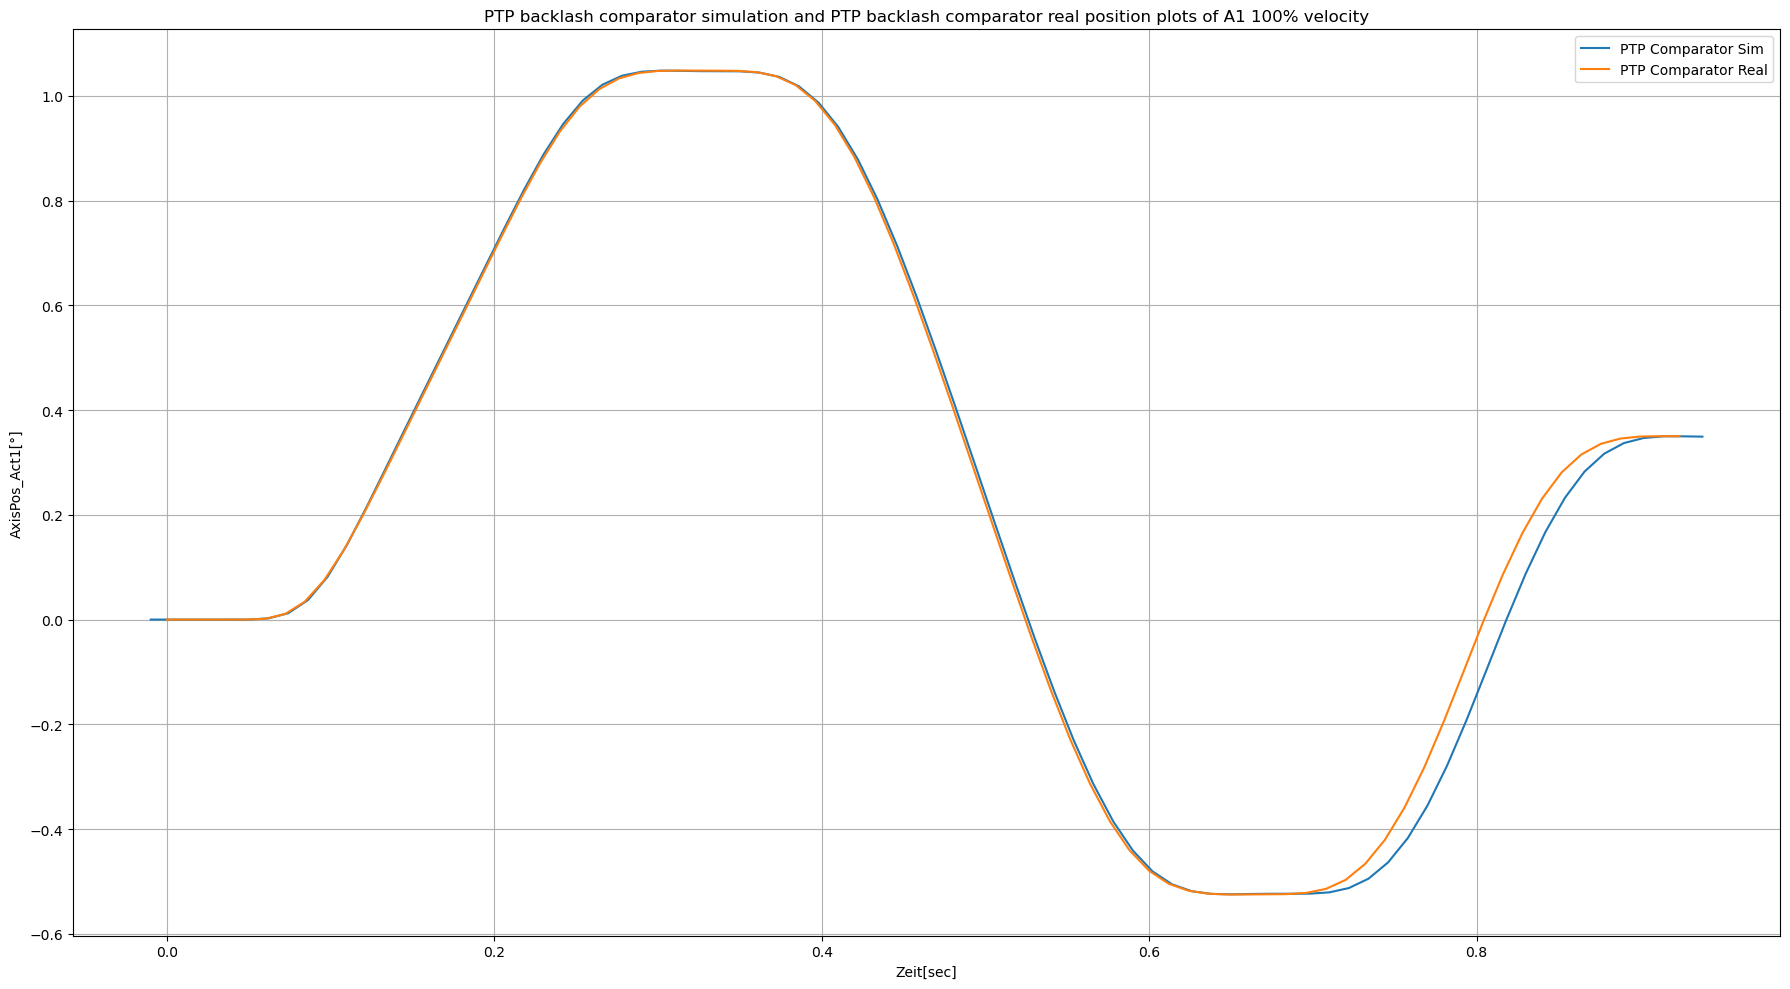

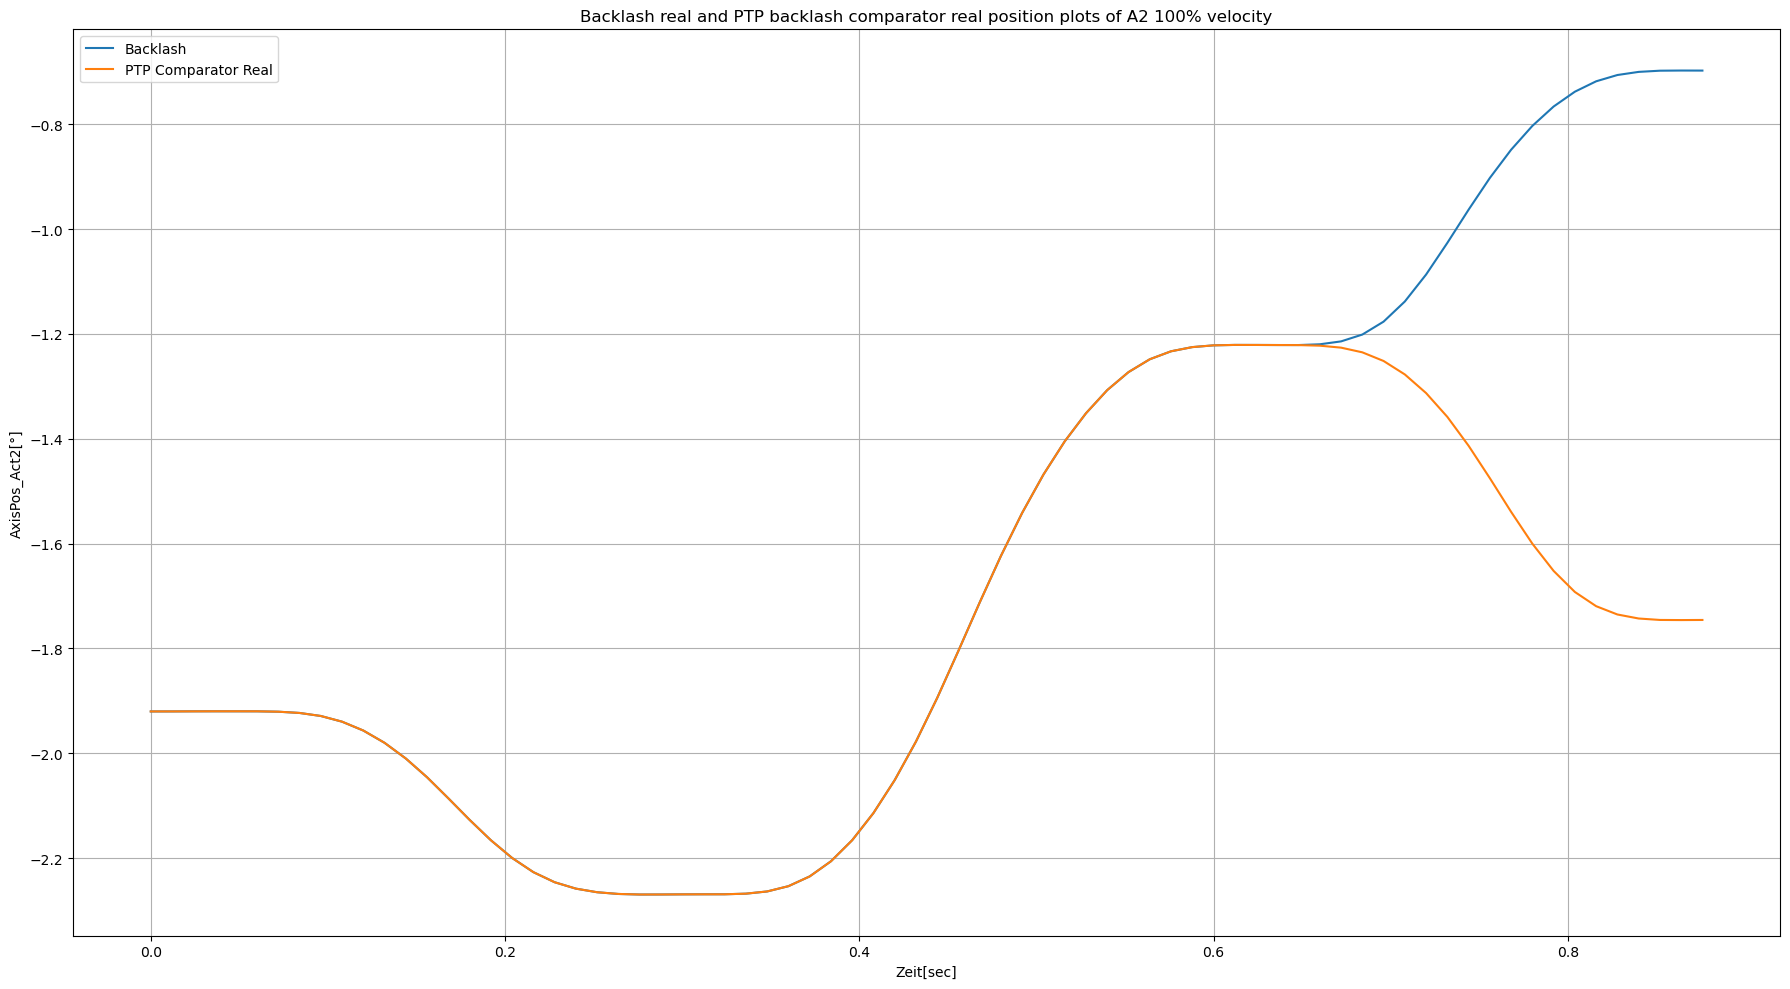

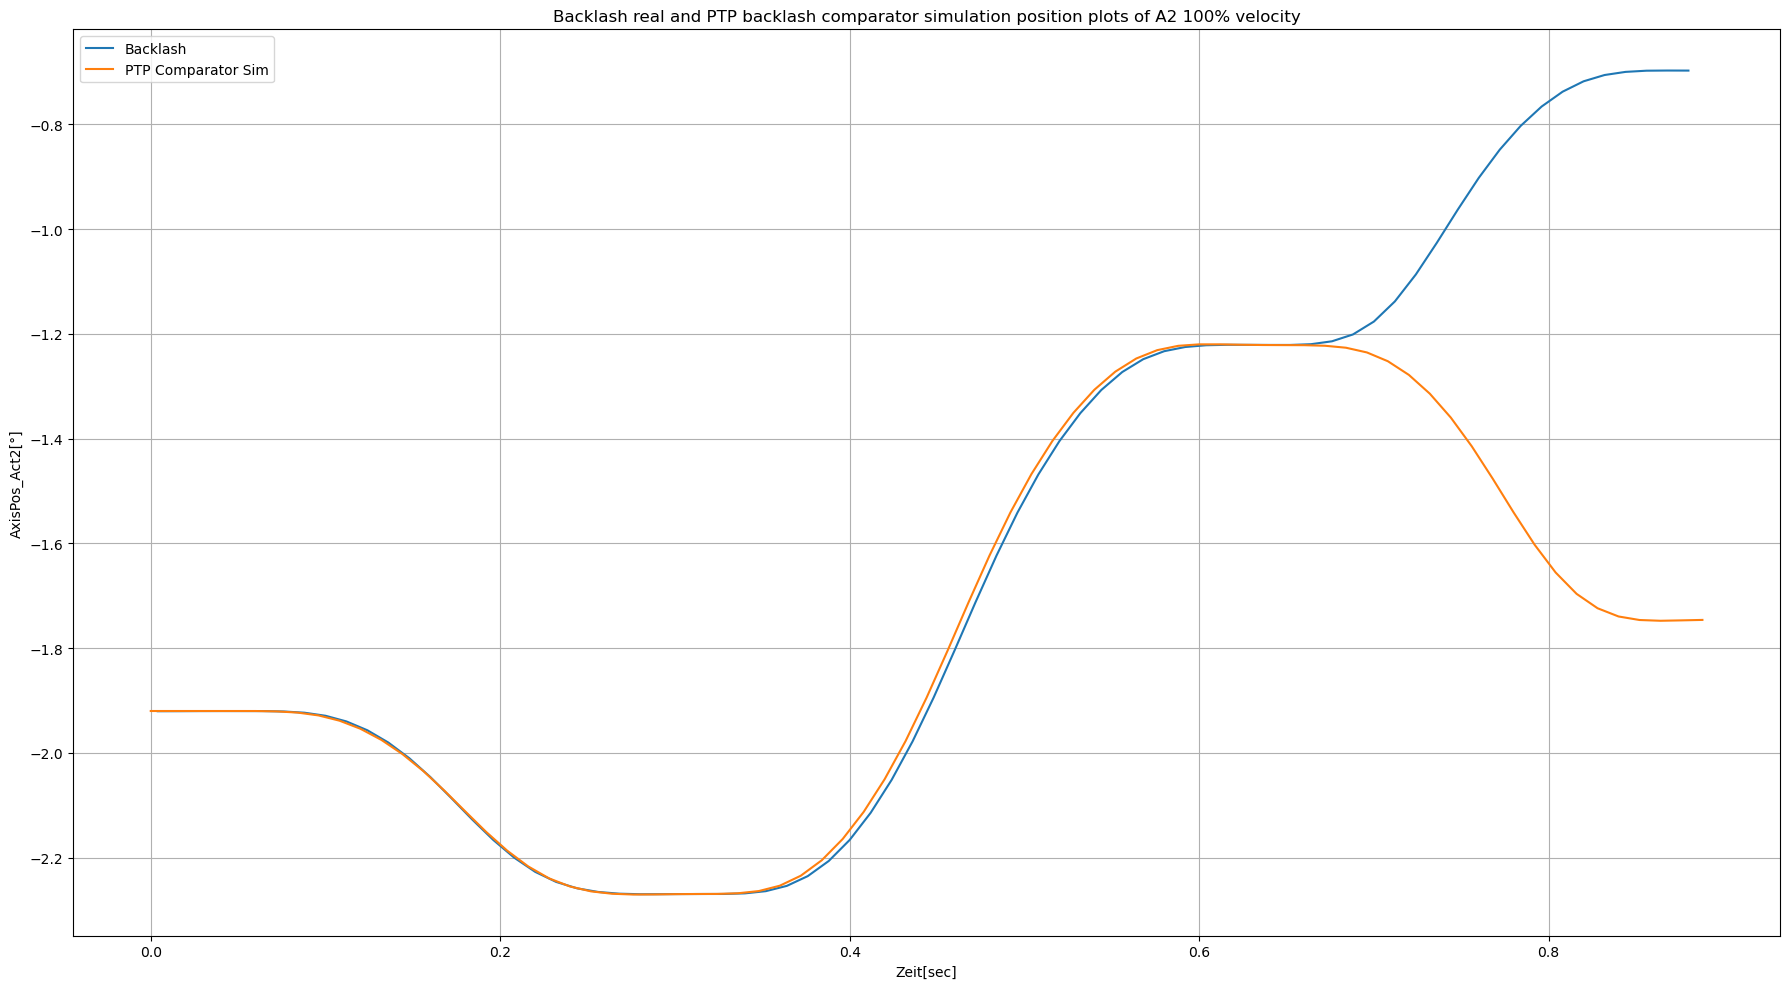

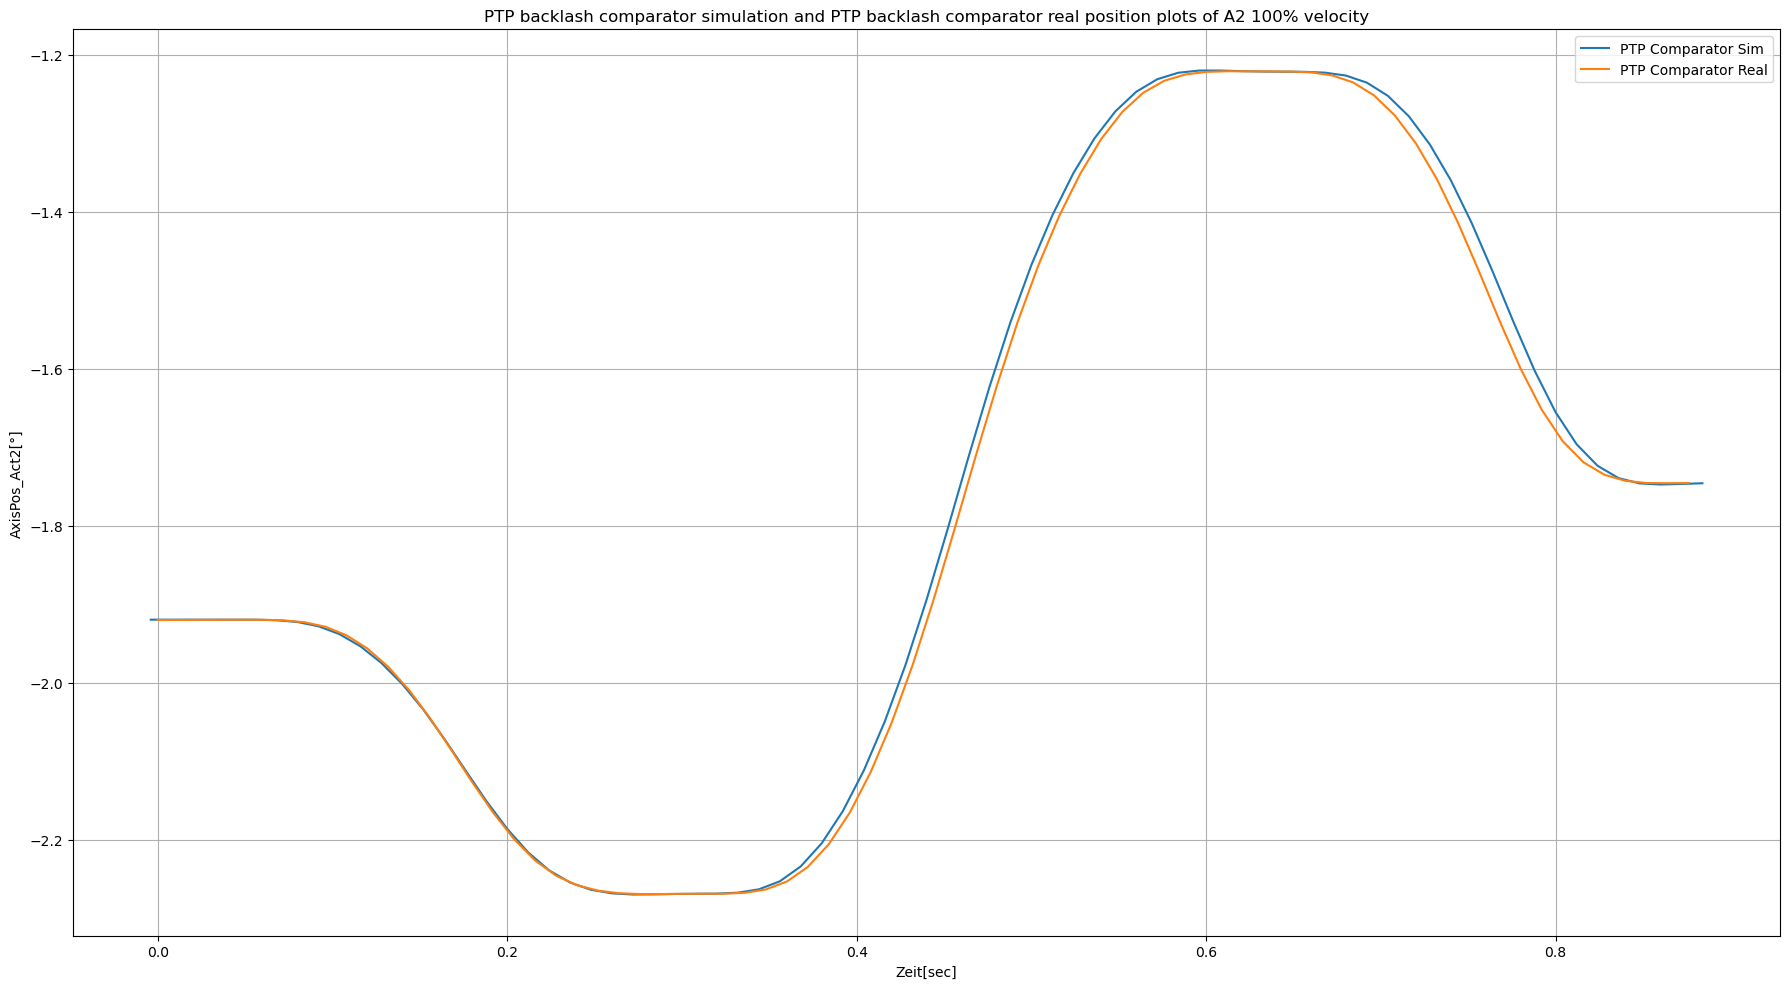

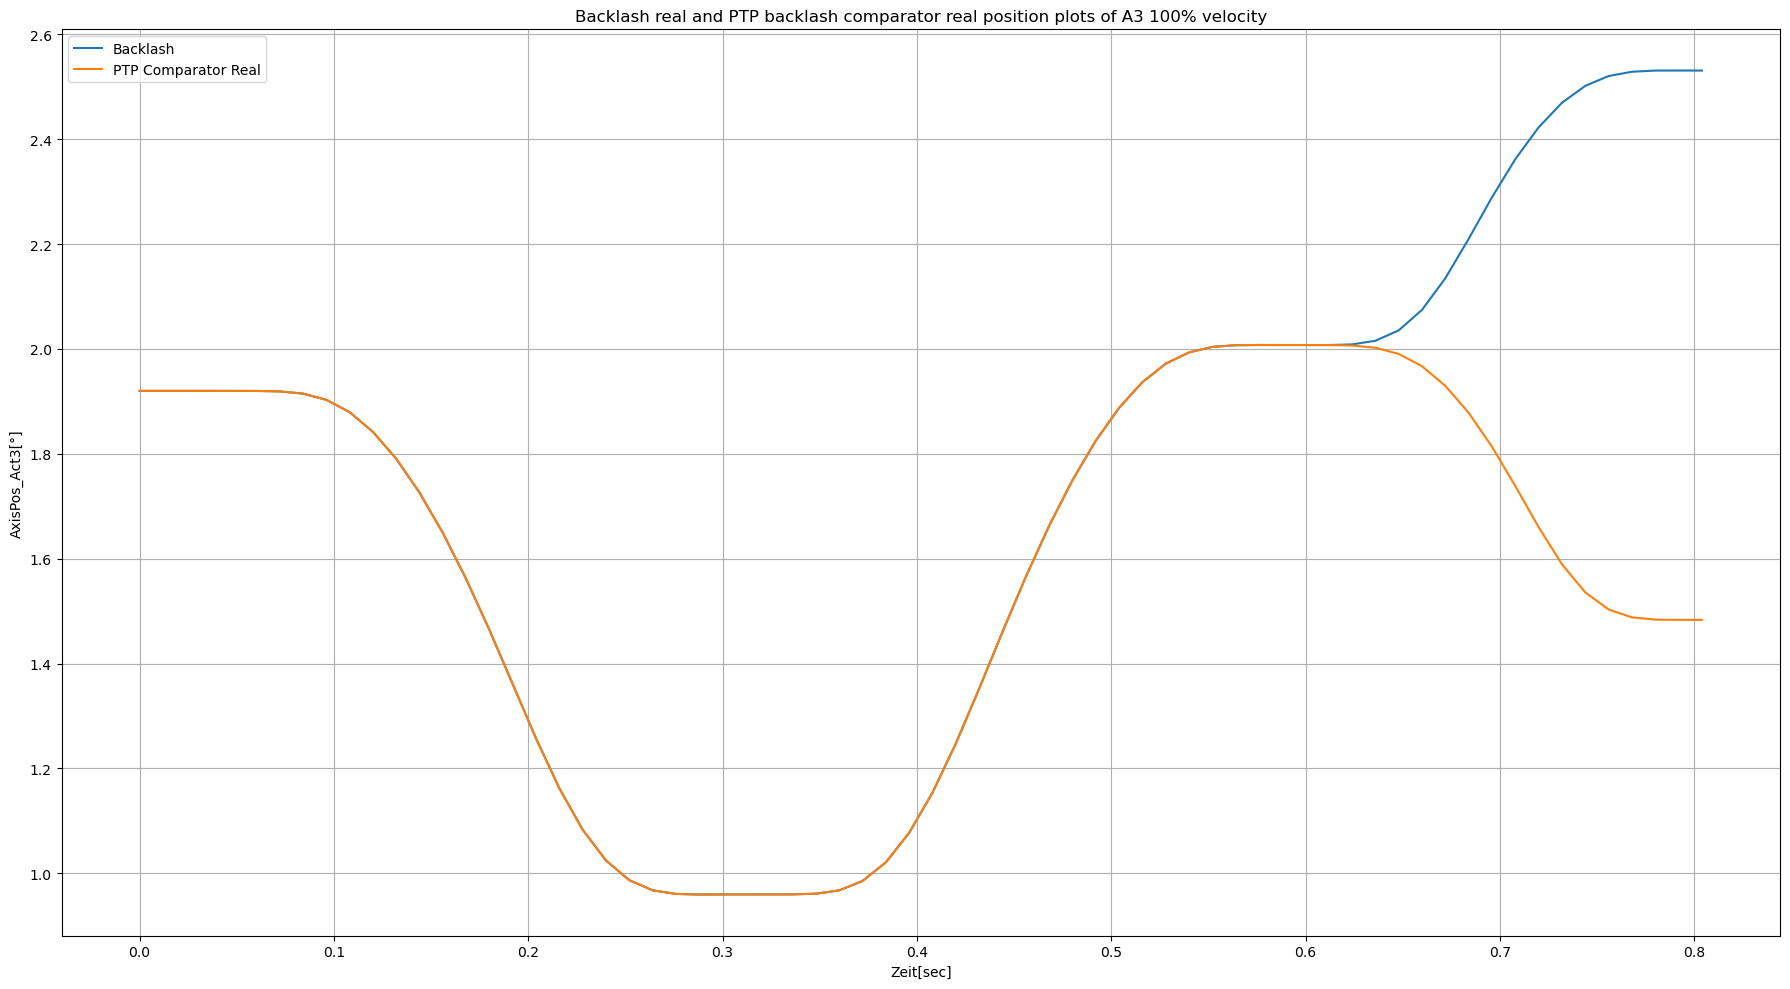

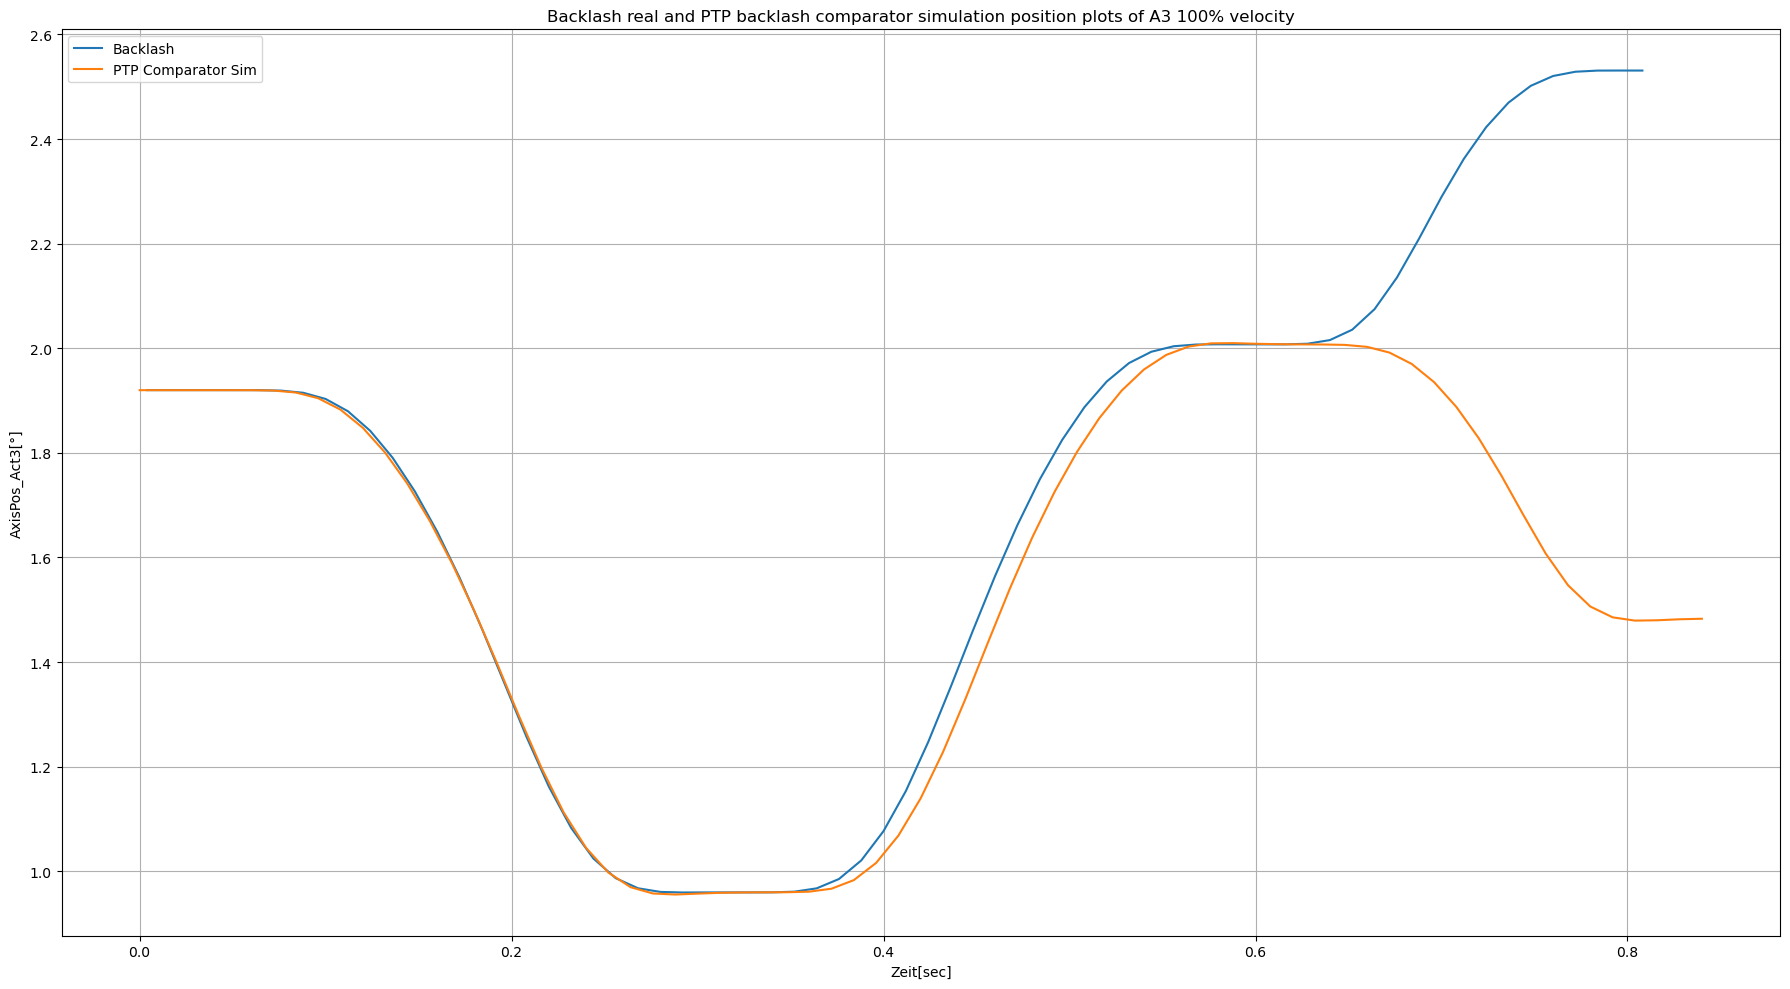

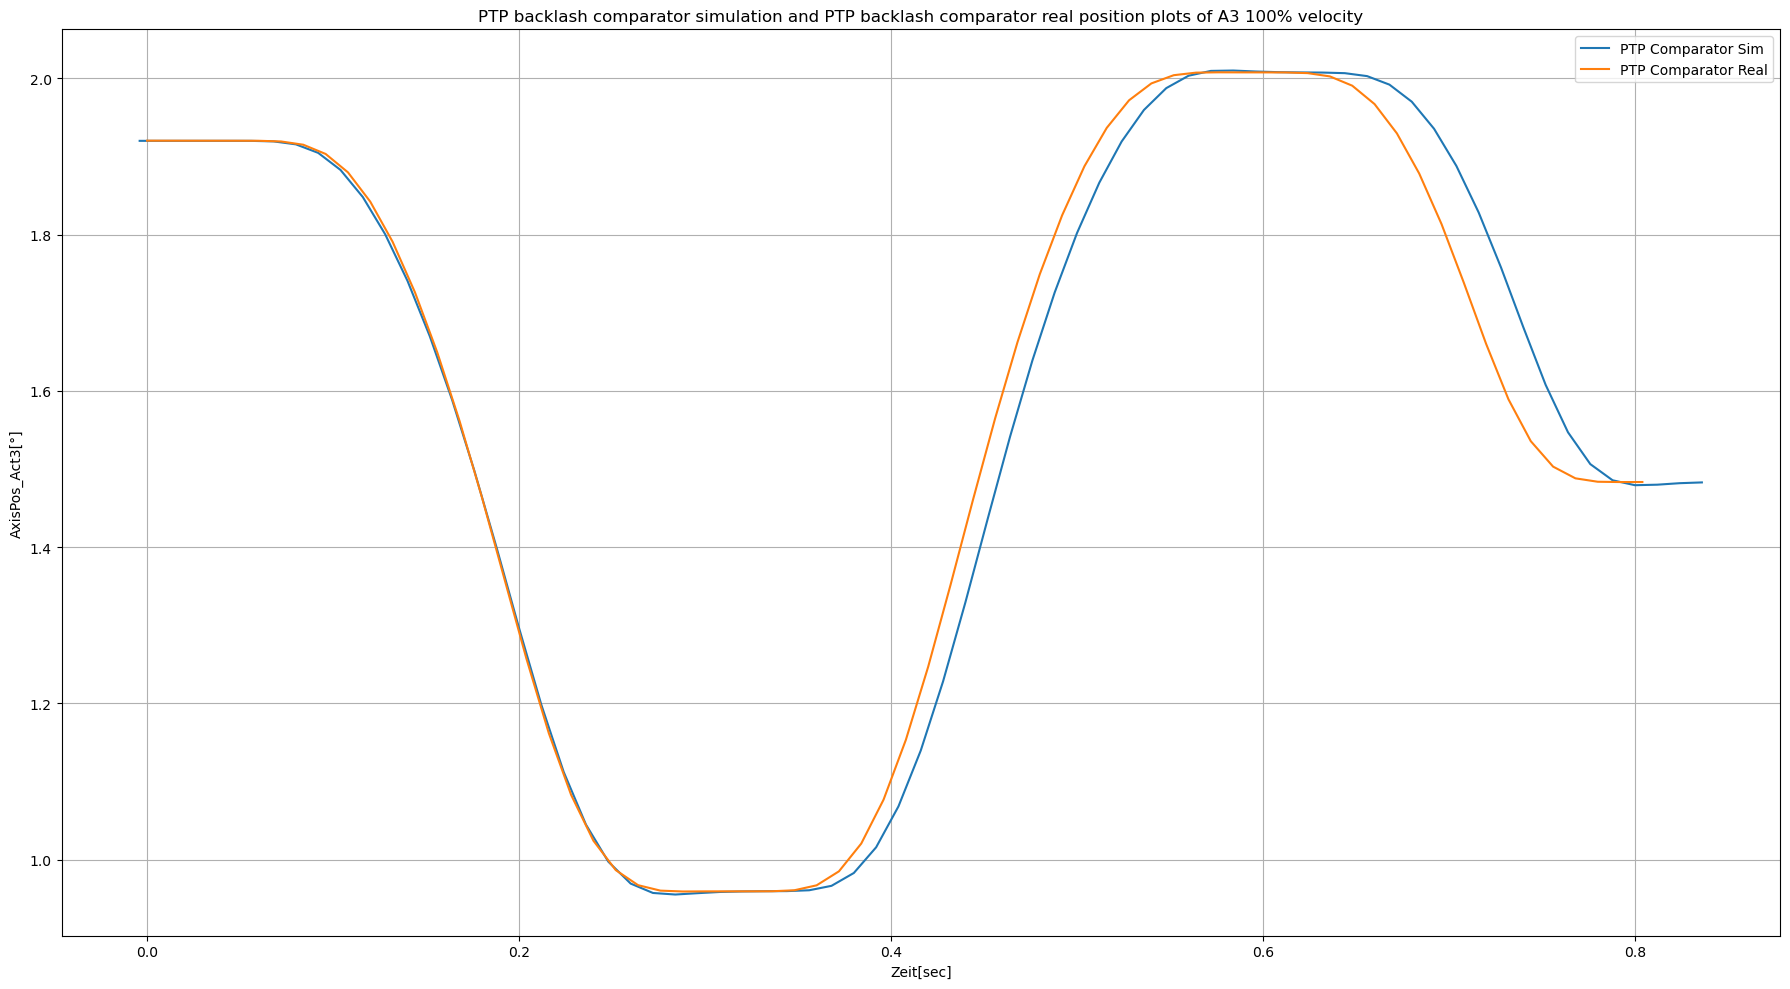

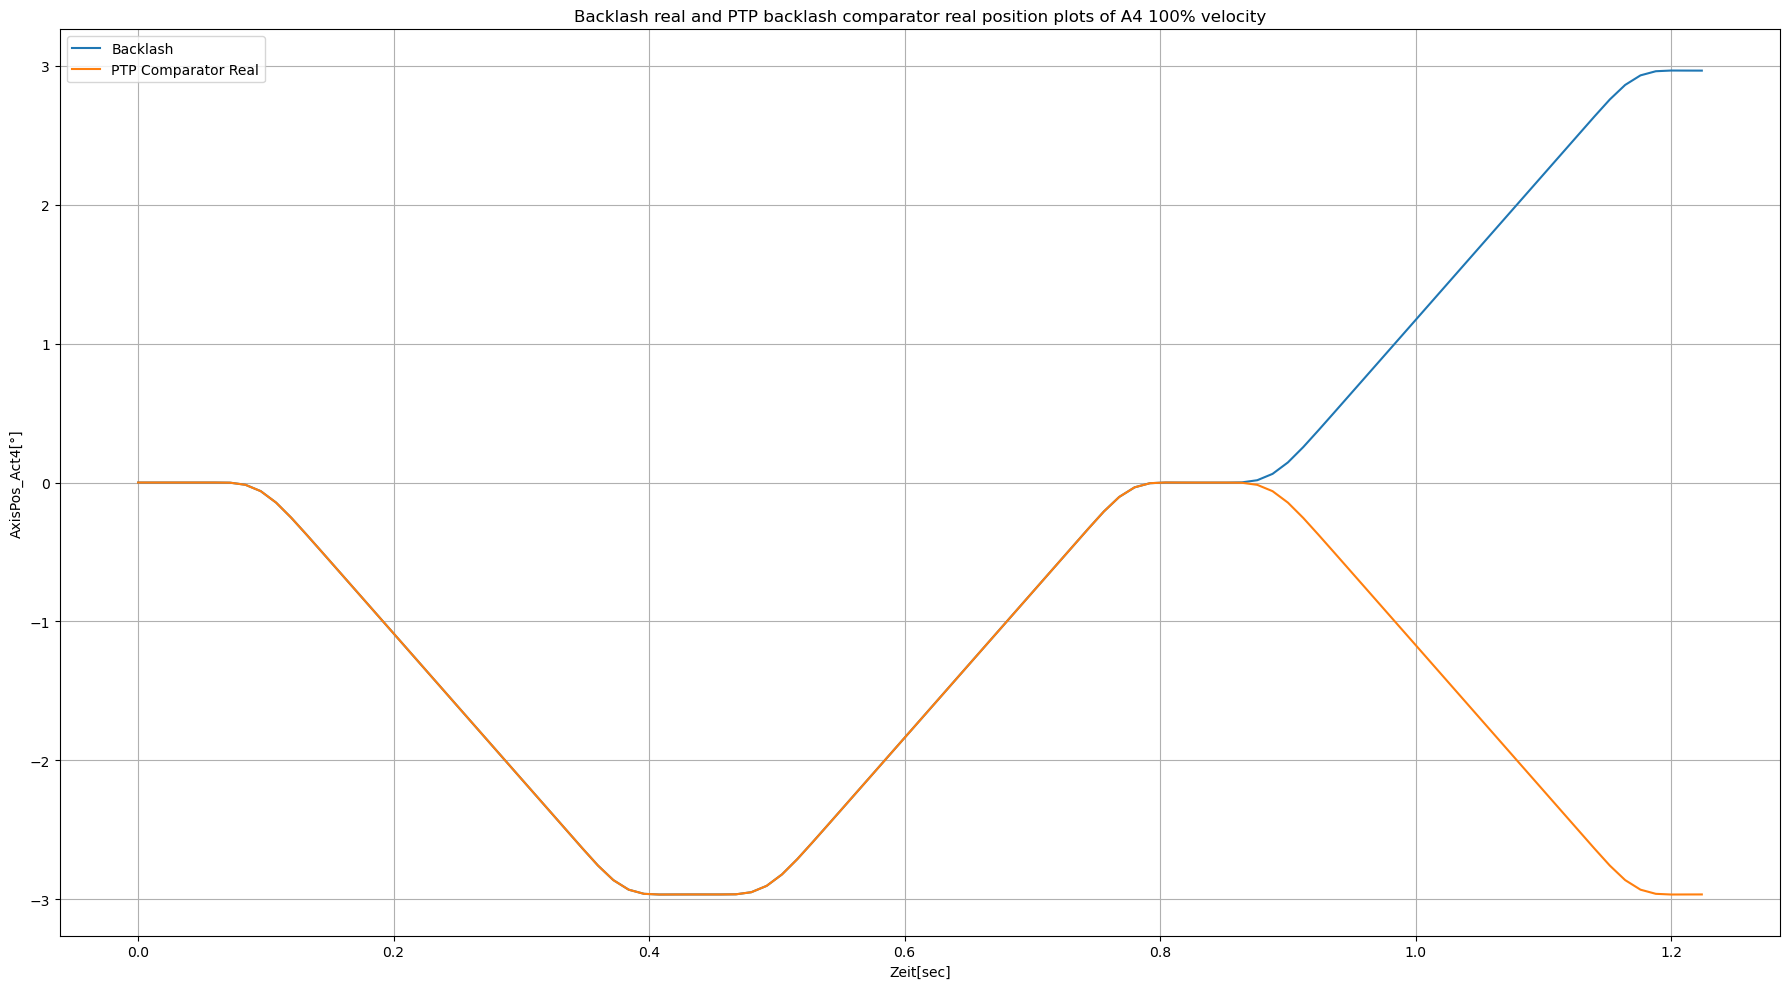

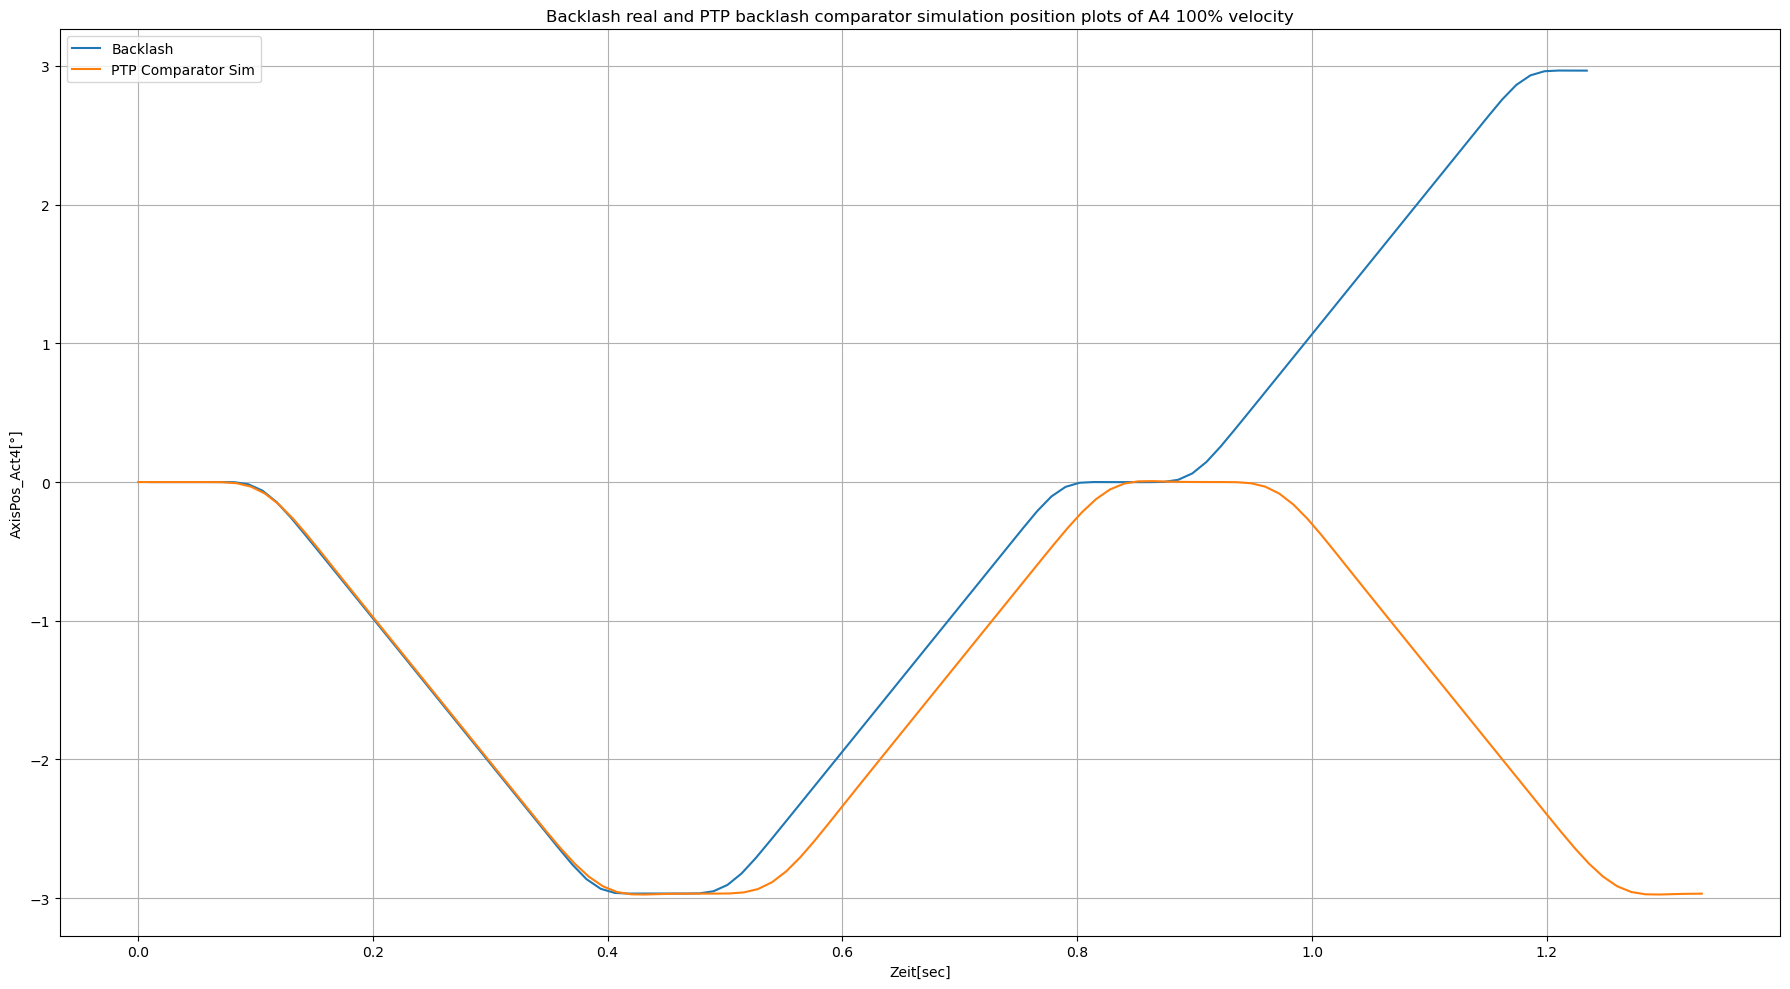

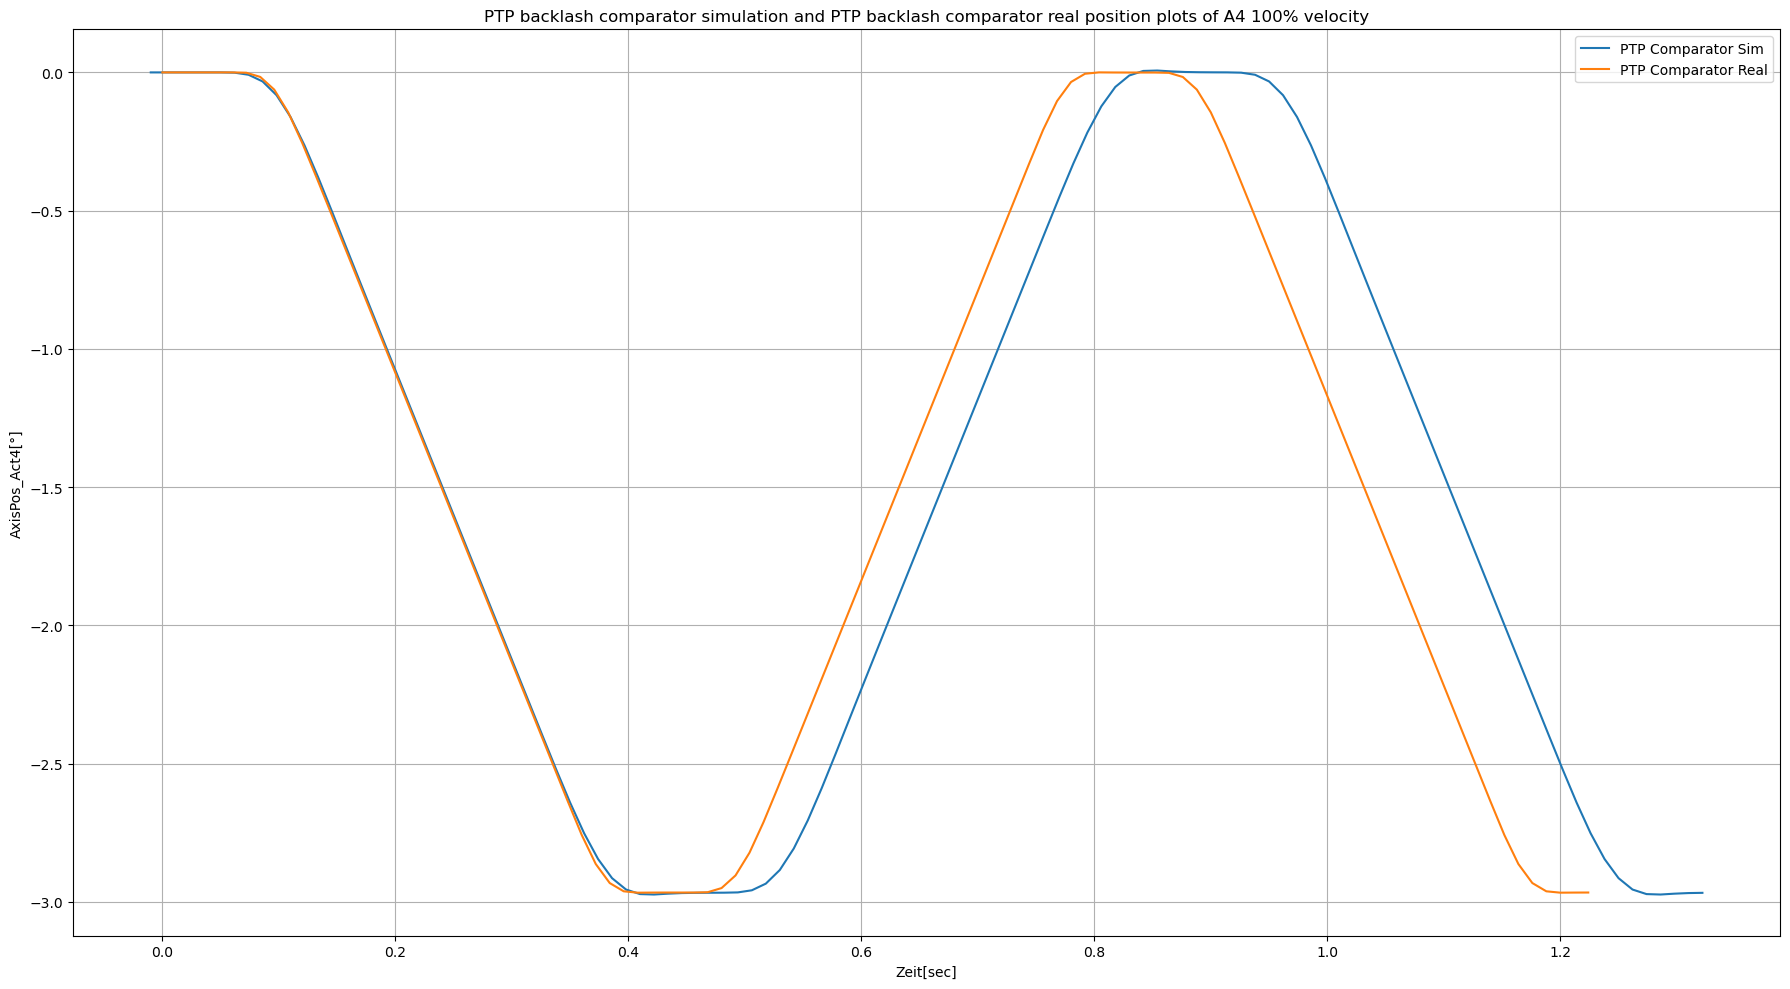

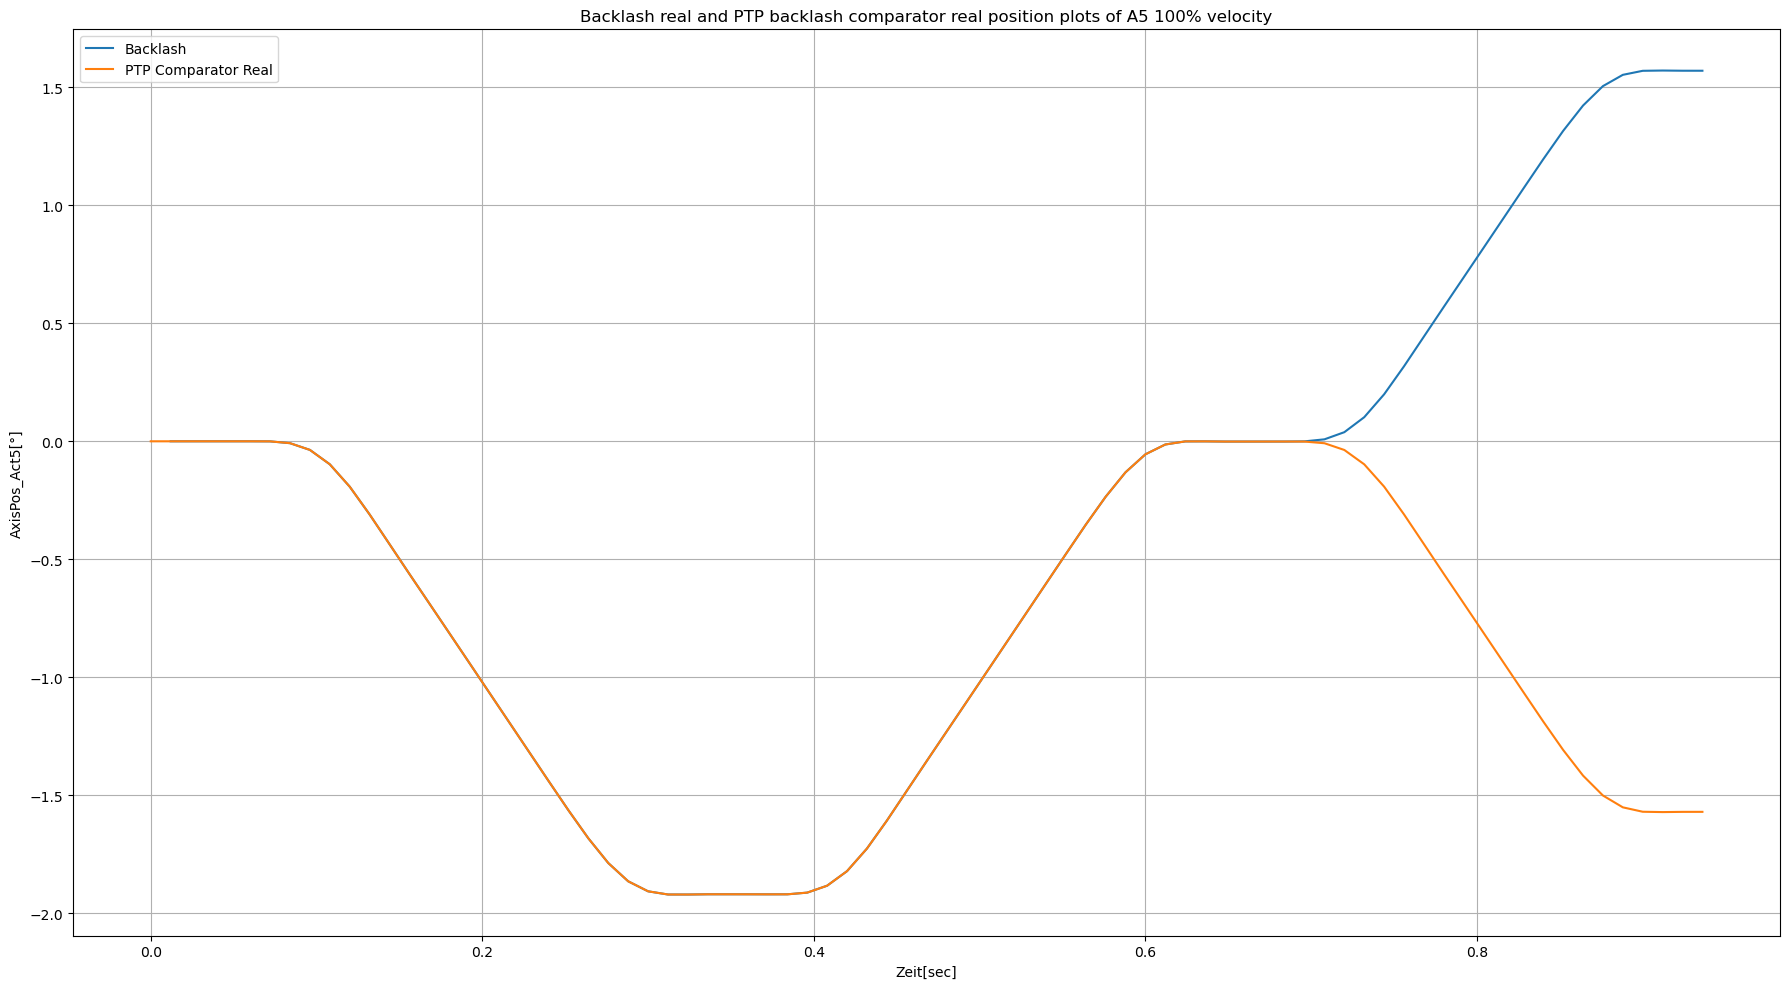

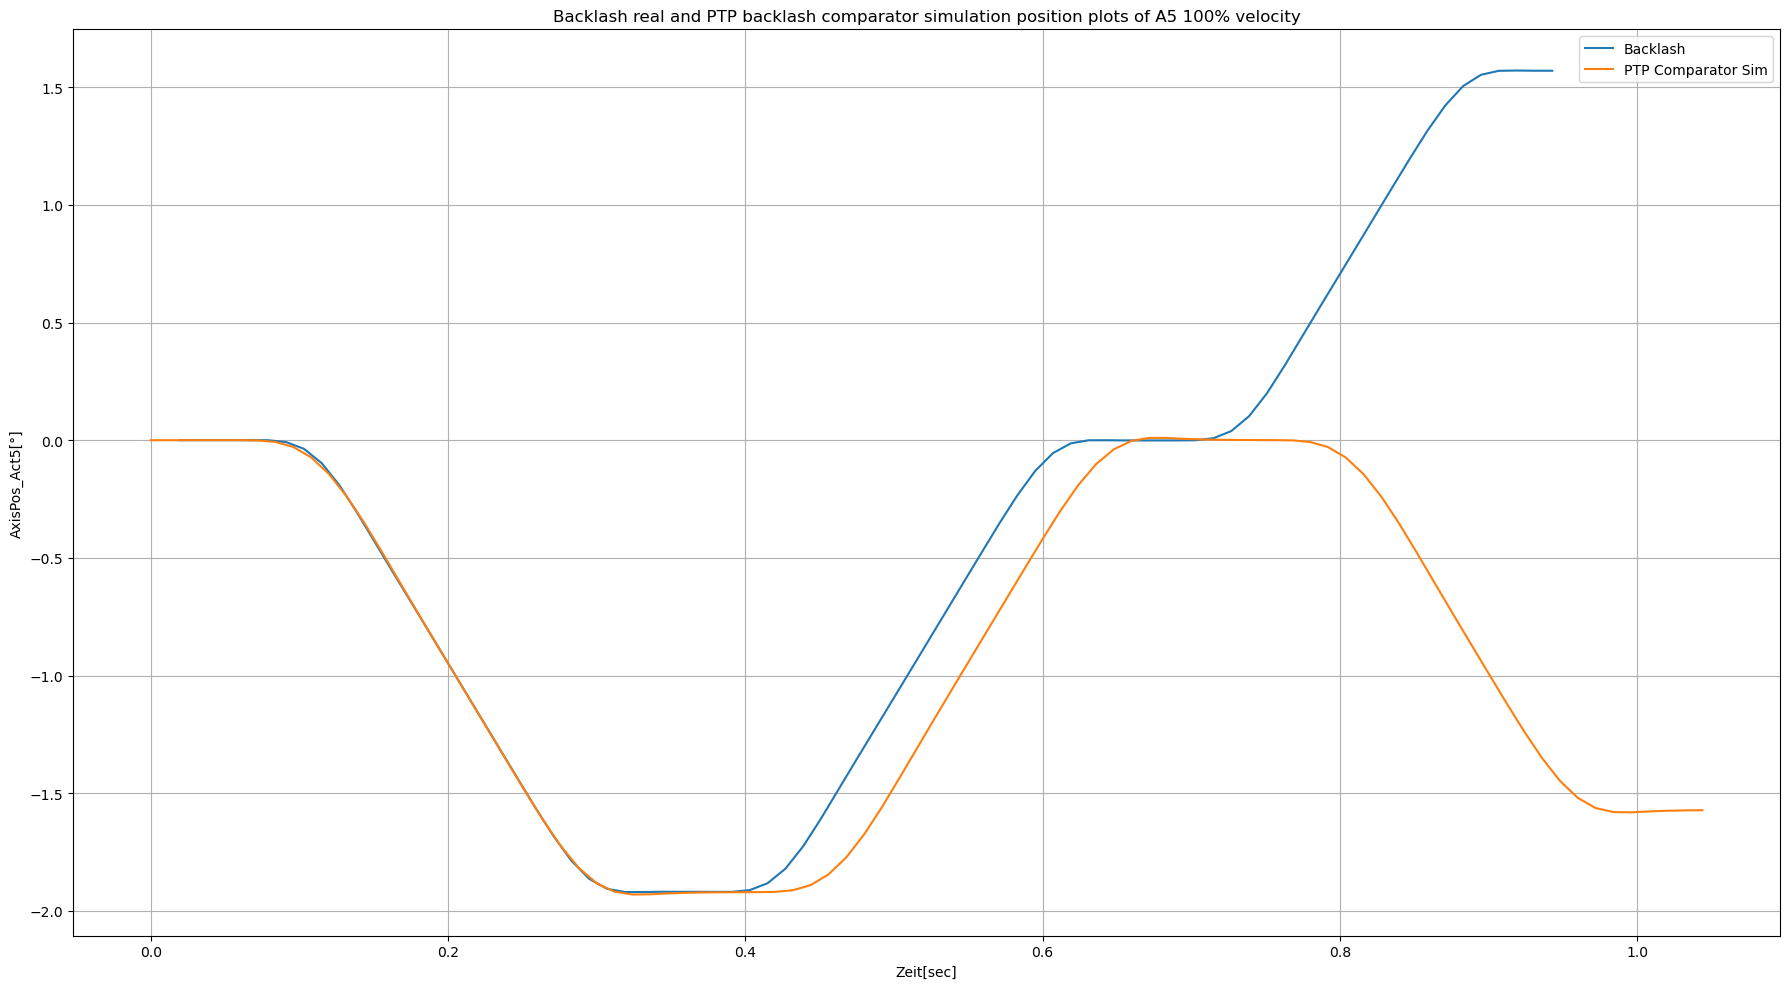

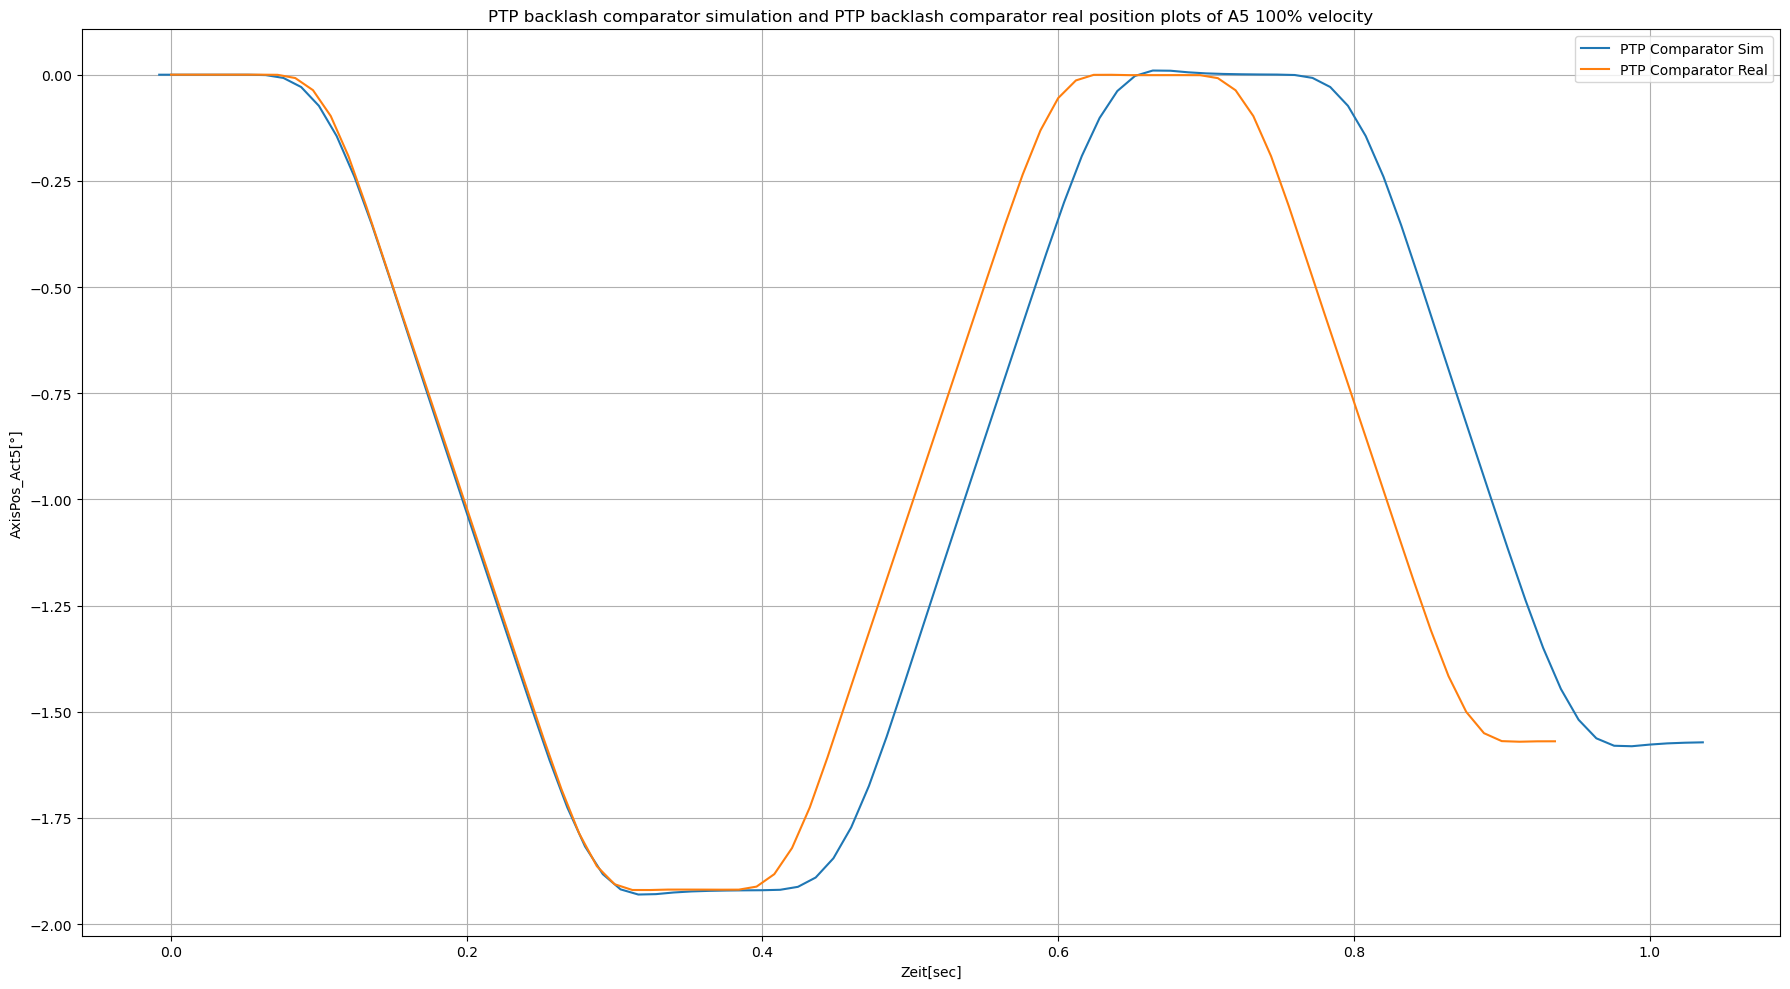

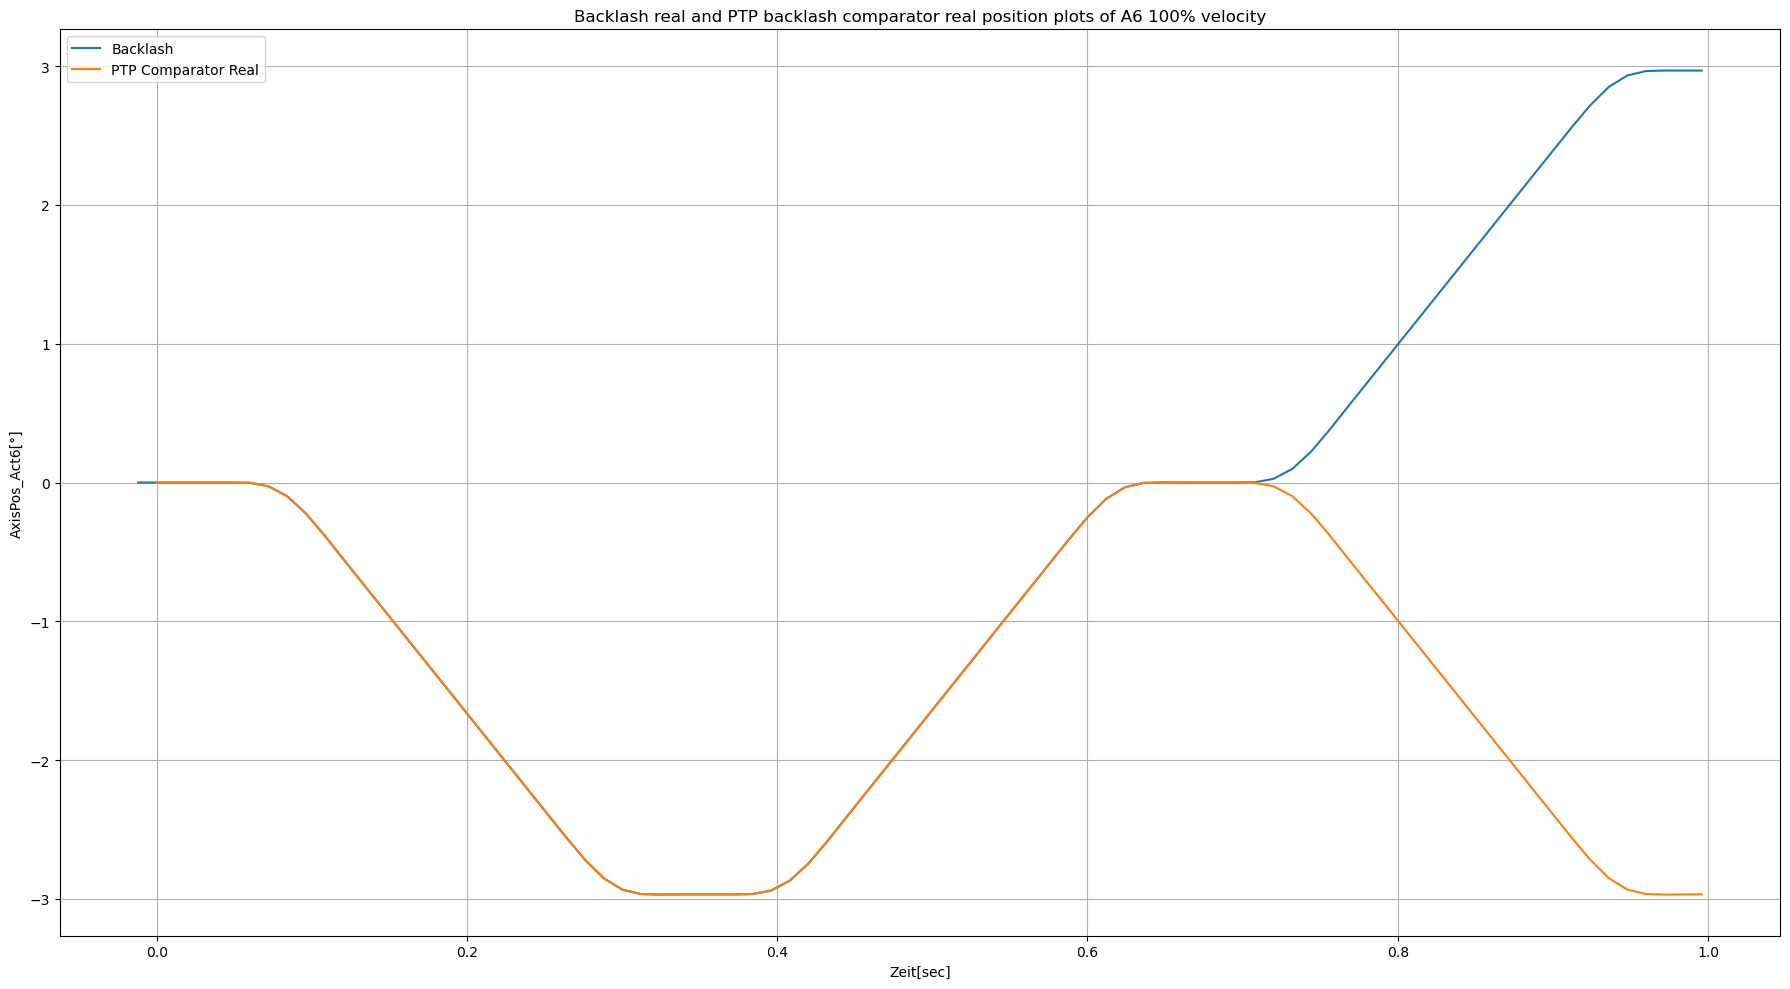

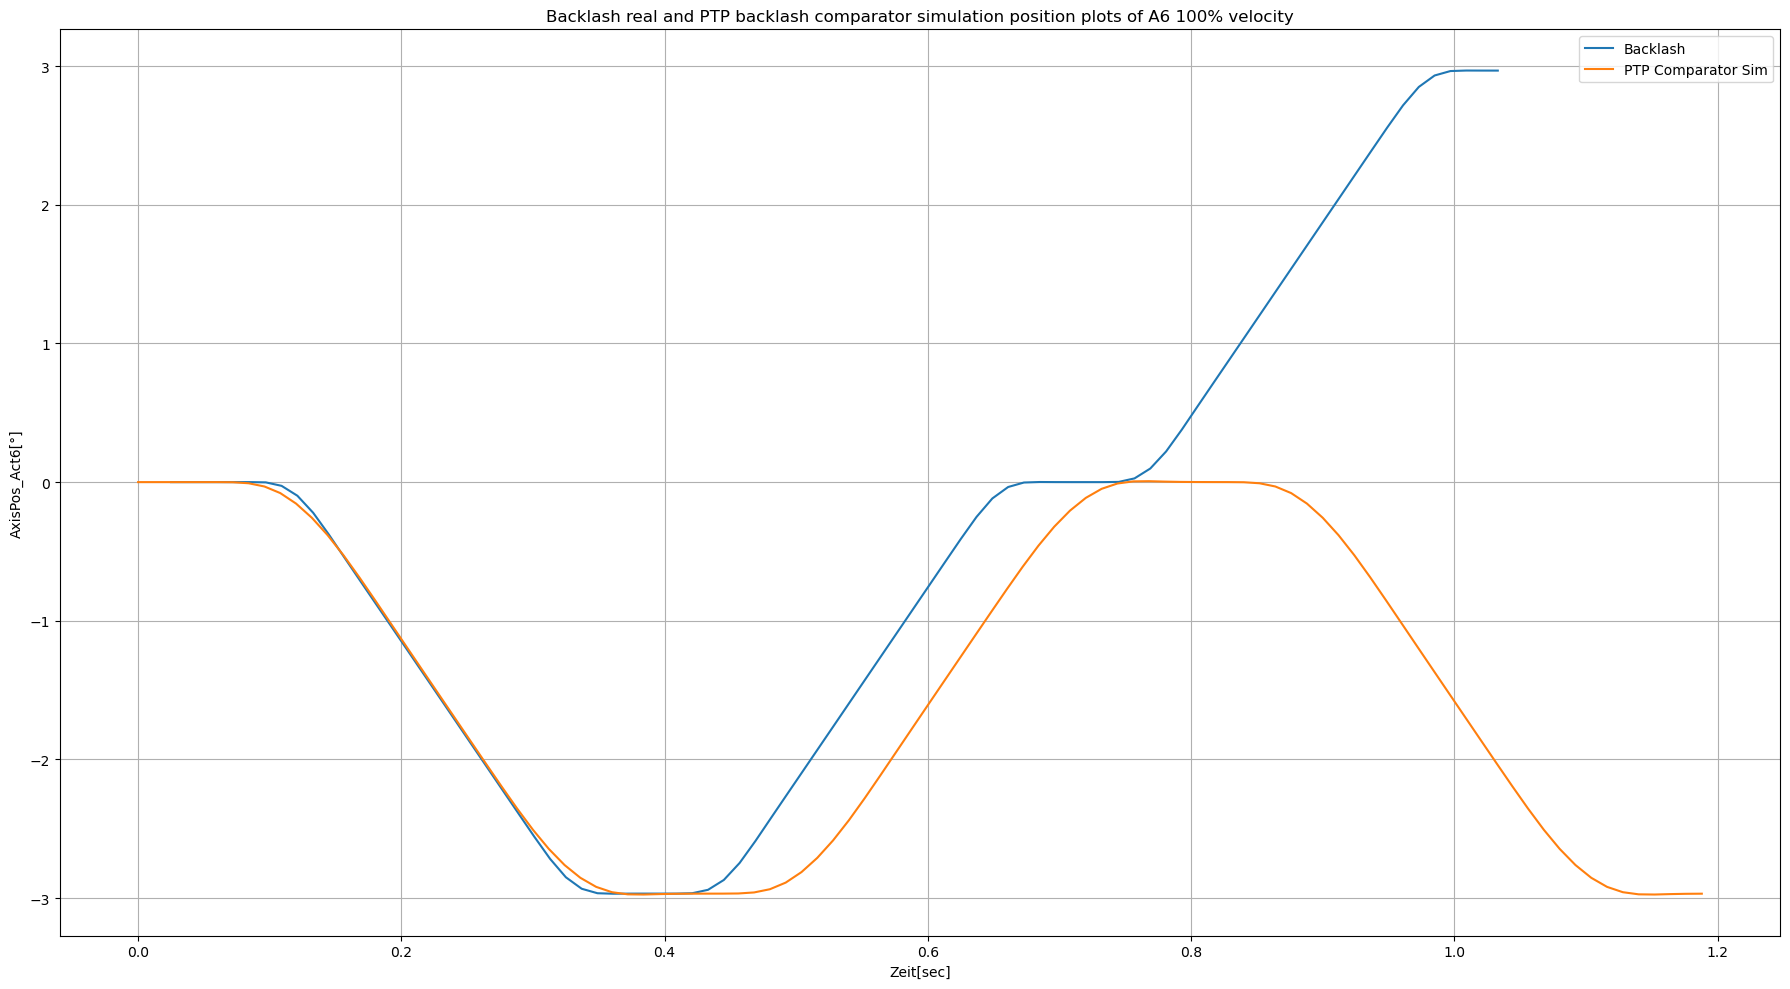

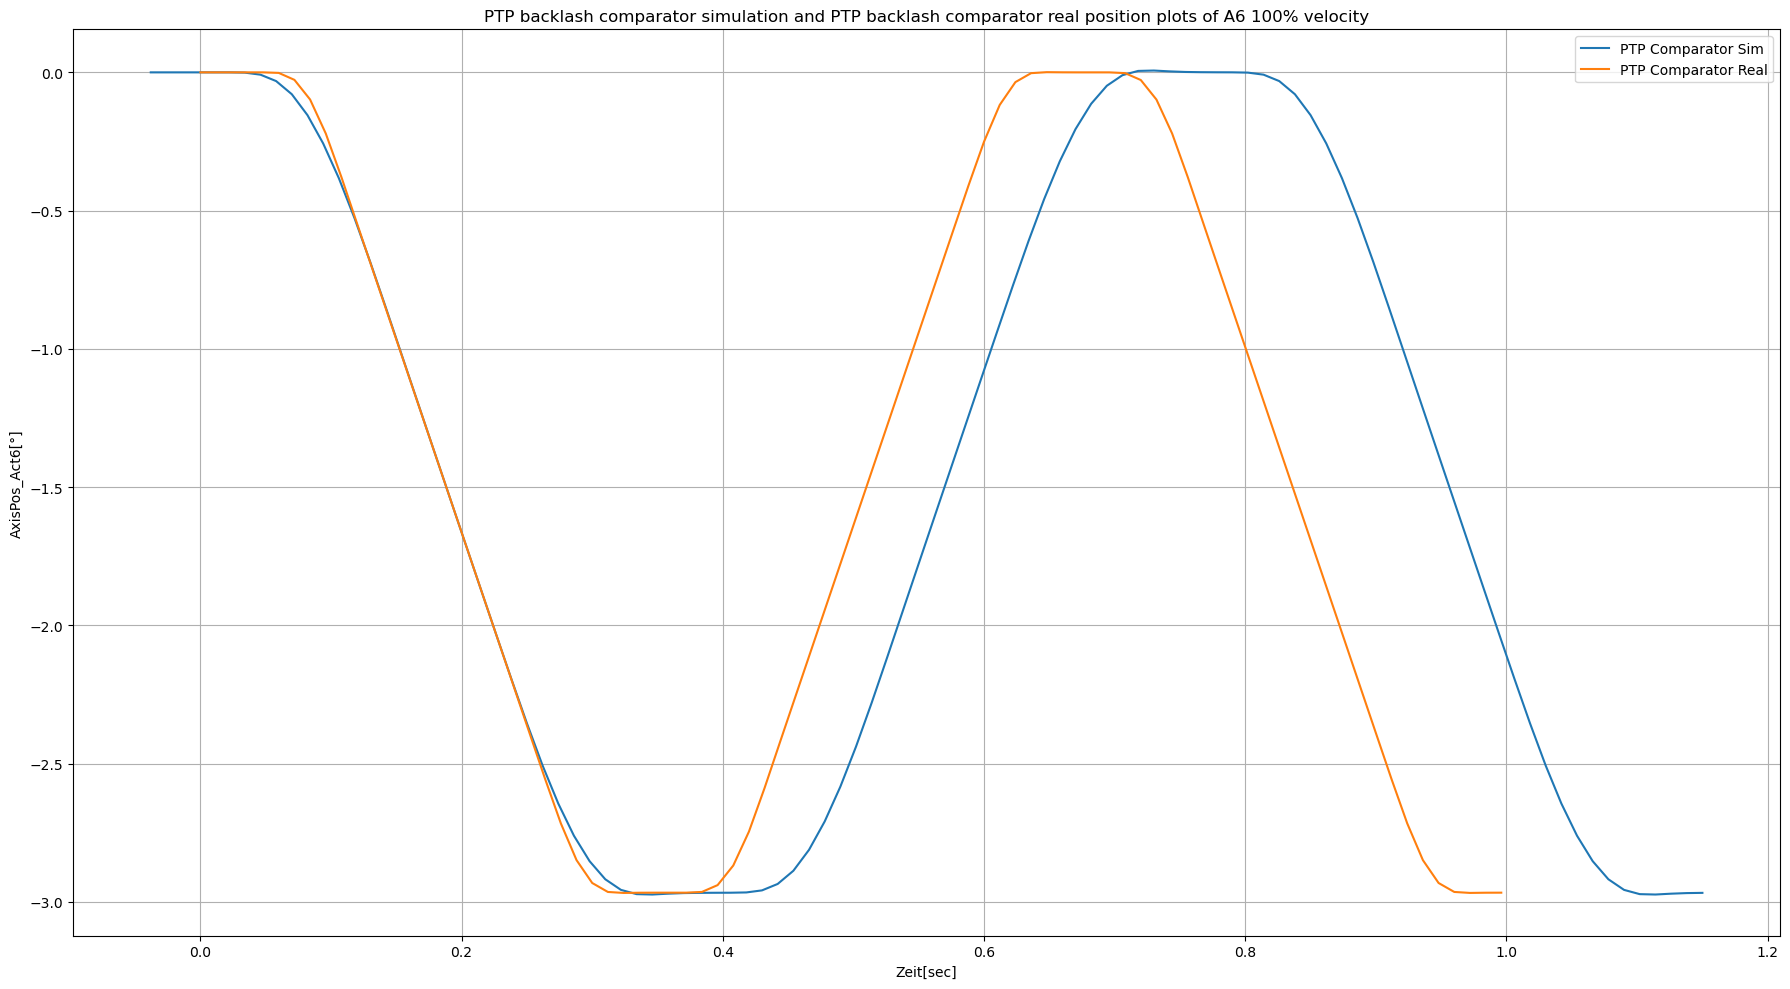

In [52]:
li_Backlash = []
li_Comparator_Real = []
li_Comparator_Sim = []
if (len(fileNames_Backlash)==len(fileNames_Comparator_Real)):
    for i in range (len(fileNames_Backlash)):
        df_Backlash = pd.read_csv(fileNames_Backlash[i], delimiter=';', encoding='cp1252')
        df_Comparator_Real = pd.read_csv(fileNames_Comparator_Real[i], delimiter=';', encoding='cp1252')
        df_Comparator_Sim = pd.read_csv(fileNames_Comparator_Sim[i], delimiter=';', encoding='cp1252')
        li_Backlash.append(df_Backlash)
        li_Comparator_Real.append(df_Comparator_Real)
        li_Comparator_Sim.append(df_Comparator_Sim)

        pos_col_Backlash = li_Backlash[i].columns[i+7]
        pos_col_Comparator_Real = li_Comparator_Real[i].columns[i+7]
        pos_col_Comparator_Sim = li_Comparator_Sim[i].columns[i+7]


        # Function for time shifting the backlash real plot
        def shift_Backlash(shift):
            time_Shift = li_Backlash[i]['Zeit[sec]'] + shift
            li_Backlash[i]['Zeit[sec]'] = time_Shift
            plt.plot(li_Backlash[i]['Zeit[sec]'], li_Backlash[i][pos_col_Backlash], label = 'Backlash')
            time_Shift = li_Backlash[i]['Zeit[sec]'] - shift
            li_Backlash[i]['Zeit[sec]'] = time_Shift


        # Backlash real and backlash comparator real plots    
        plt.figure(num=1, figsize=(18,10), dpi=100, tight_layout=True)

        if (i==4):
            shift_Backlash(0.012)

        elif (i==5):
            shift_Backlash(-0.012)

        else:
            shift_Backlash(0)

        plt.plot(li_Comparator_Real[i]['Zeit[sec]'], li_Comparator_Real[i][pos_col_Comparator_Real], label = 'PTP Comparator Real')
        plt.legend()
        plt.grid()
        # plt.xlim([0,1])
        # plt.ylim([0,1])
        plt.xlabel(li_Comparator_Real[i].columns[0])
        plt.ylabel(li_Comparator_Real[i].columns[i+7])
        plt.title('Backlash real and PTP backlash comparator real position plots of A' + str(i+1) +' 100% velocity')
        if not os.path.exists('Images/Comparator_Real'):
            os.makedirs('Images/Comparator_Real')
        plt.savefig('Images/Comparator_Real/A' + str(i+1) + '.jpg')
        plt.show()
        plt.close()

        # Backlash real and backlash comparator simulation plots
        plt.figure(num=2, figsize=(18,10), dpi=100, tight_layout=True)

        if (i==0 or i==3):
            shift_Backlash(0.01)

        elif (i==1 or i==2):
            shift_Backlash(0.004)

        elif (i==4):
            shift_Backlash(0.019)

        elif (i==5):
            shift_Backlash(0.025)

        else:
            shift_Backlash(0)

        plt.plot(li_Comparator_Sim[i]['Zeit[sec]'], li_Comparator_Sim[i][pos_col_Comparator_Sim], label = 'PTP Comparator Sim')
        plt.legend()
        plt.grid()
        # plt.xlim([0,1])
        # plt.ylim([0,1])
        plt.xlabel(li_Comparator_Real[i].columns[0])
        plt.ylabel(li_Comparator_Real[i].columns[i+7])
        plt.title('Backlash real and PTP backlash comparator simulation position plots of A' + str(i+1) +' 100% velocity')
        if not os.path.exists('Images/Comparator_Sim'):
            os.makedirs('Images/Comparator_Sim')
        plt.savefig('Images/Comparator_Sim/A' + str(i+1) + '.jpg')
        plt.show()
        plt.close()


        # Function for time shifting the backlash comparator simulation plot
        def shift_Sim(shift):
            time_Shift = li_Comparator_Sim[i]['Zeit[sec]'] + shift
            li_Comparator_Sim[i]['Zeit[sec]'] = time_Shift
            plt.plot(li_Comparator_Sim[i]['Zeit[sec]'], li_Comparator_Sim[i][pos_col_Comparator_Sim], label = 'PTP Comparator Sim')
            time_Shift = li_Comparator_Sim[i]['Zeit[sec]'] - shift
            li_Comparator_Sim[i]['Zeit[sec]'] = time_Shift


        # Backlash comparator real and backlash comparator simulation plots
        plt.figure(num=3, figsize=(18,10), dpi=100, tight_layout=True)

        if (i==0 or i==3):
            shift_Sim(-0.01)

        elif (i==1 or i==2):
            shift_Sim(-0.004)

        elif (i==4):
            shift_Sim(-0.008)

        elif (i==5):
            shift_Sim(-0.038)

        else:
            shift_Sim(0)

        plt.plot(li_Comparator_Real[i]['Zeit[sec]'], li_Comparator_Real[i][pos_col_Comparator_Real], label = 'PTP Comparator Real')
        plt.legend()
        plt.grid()
        # plt.xlim([0,1])
        # plt.ylim([0,1])
        plt.xlabel(li_Comparator_Real[i].columns[0])
        plt.ylabel(li_Comparator_Real[i].columns[i+7])
        plt.title('PTP backlash comparator simulation and PTP backlash comparator real position plots of A' + str(i+1) +' 100% velocity')
        if not os.path.exists('Images/Real_Sim'):
            os.makedirs('Images/Real_Sim')
        plt.savefig('Images/Real_Sim/A' + str(i+1) + '.jpg')
        plt.show()
        plt.close()

       